In [1]:
import csv

In [6]:
# 'r' 모드가 항상 디폴트인데 그냥 명확히 넣어주자
# csv는 ','로 데이터를 구분함
f = open('./seoul.csv', 'r')

data = csv.reader(f)
# print(data)

# for row in data:
#     print(row)

header = next(data)
print(header)

f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


In [7]:
# iterator 객체
dir(data)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'dialect',
 'line_num']

In [10]:
a = [4,5,2,2,100,-10]
# 최대값 구하기
maximum = -999
for i in a:
    if i > maximum:
        maximum = i
print(maximum)

minimum = 999
for i in a:
    if i < minimum:
        minimum = i
print(minimum)

100
-10


In [13]:
# 관측사상 최고 기온 알아보기

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    # print(header)
    
    maximum = -999
    for row in data:
        if row[-1] != '':
            tmp = float(row[-1])
            if maximum < tmp:
                maximum = tmp
    print(maximum)

38.4


In [18]:
import csv

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    max_tmp = -999
    max_day = ''
    for row in data:
        # print(row)
        if row[-1] != '':
            tmp = float(row[-1])
            if max_tmp < tmp:
                max_tmp = tmp
                max_day = row[0]
print(max_day, max_tmp)

1994-07-24 38.4


In [15]:
header

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [80]:
import csv

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    max_tmp = -999
    max_day = ''
    for row in data:
        # print(row)
        try:
            tmp = float(row[-1])
            if max_tmp < tmp:
                max_tmp = tmp
                max_day = row[0]
        except:
            pass
print(max_day, max_tmp)

1994-07-24 38.4


In [23]:
import csv

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    min_tmp = 999
    min_day = ''
    for row in data:
        try:
            tmp = float(row[-2])
            if min_tmp > tmp:
                min_tmp = tmp
                min_day = row[0]
        except:
            pass
print(min_day, min_tmp)

1927-12-31 -23.1


In [21]:
header

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [25]:
# 기상청이 생긴 이후 내 생일날짜가 가장 낮은 온도와 날짜는? (4월 10일)
import csv

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    min_tmp = 999
    min_day = ''
    # birth_day = '4-10' # 슬라이싱
    birth_day = '-04-10'
    # 이거 앞에 - 안 붙여주면 년도 월로도 검색이 됨
    
    for row in data:
        try:
            tmp = float(row[-2])
            # if tmp < min_tmp and birth_day == row[0][5:]: #슬라이싱
            if tmp < min_tmp and birth_day in row[0]:
                min_tmp = tmp
                min_day = row[0]
        except:
            pass
print(min_day, min_tmp)

1925-04-10 -0.9


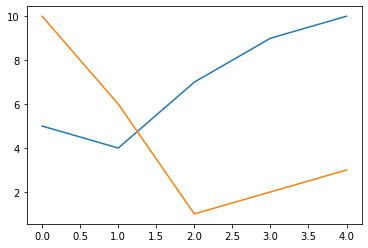

In [31]:
import matplotlib.pyplot as plt

a = [5,4,7,9,10]
b = [10,6,1,2,3]

plt.plot(a)
plt.plot(b)
plt.show()

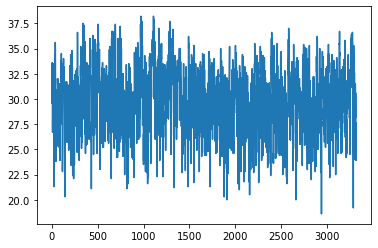

In [37]:
#모든 해의 8월 데이터를 리스트로 담아 시각화 (최고온도)
import csv
import matplotlib.pyplot as plt

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    max_August = []
    August = '08'
    for row in data:
        try:
            if row[0][5:7] == August:
                max_August.append(float(row[-1]))
        except:
            pass
# print(max_August)
plt.plot(max_August)
plt.show()

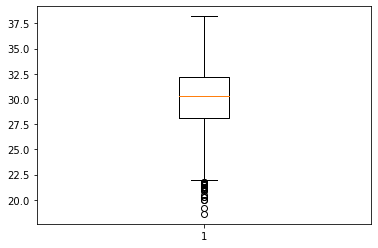

In [38]:
plt.boxplot(max_August)
plt.show()

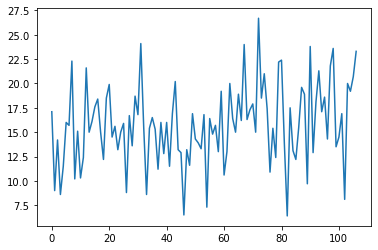

In [57]:
# 본인 생일(4월 10일)의 최고 기온을 그래프로 그리기
# csv: 엑셀파일 다루는데 사용
# matplotlib: 데이터 시각화에 사용
import csv
import matplotlib.pyplot as plt

with open('./seoul.csv', 'r') as f:    # with문 쓰면 close() 자동으로 실행
    data = csv.reader(f)                # 엑셀파일 읽어서 data에 저장
    header = next(data)                 # 속성이름 따로 저장
    max_temp = []                       # 나머지 변수 선언
    birth_day = '04-10'
    
    for row in data:
        try:                            # 결측치 처리로 try-except문 사용
            # 2022-07-25 [5~]
            if row[0][5:] == birth_day: # 생일이면 최대기온만 추출
                max_temp.append(float(row[-1]))
        except:
            pass
# print(max_temp)

plt.plot(max_temp)                        # 시각화로 출력
plt.show()

# 모양이 안 이쁨 (float을 안해줘서 그랬음)
# https://wikidocs.net/92089 (plt.yticks(np.arange(1, 6)))

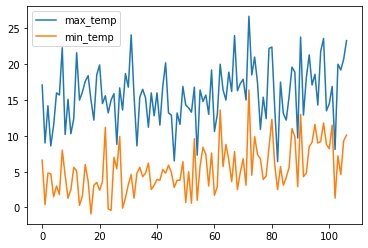

In [60]:
# 본인 생일(4월 10일)의 최고 기온, 최저기온을 그래프로 그리기
# 위와 동일 최저기온만 추가됨
import csv
import matplotlib.pyplot as plt

with open('./seoul.csv', 'r') as f:
    data = csv.reader(f)
    header = next(data)
    max_temp = []
    min_temp = []
    birth_day = '04-10'
    
    for row in data:
        try:
            if row[0][5:] == birth_day:
                max_temp.append(float(row[-1]))
                min_temp.append(float(row[-2]))
        except:
            pass

# 그래프 2개니까 label 표시
plt.plot(max_temp, label='max_temp')
plt.plot(min_temp, label='min_temp')
plt.legend()
plt.show()

In [79]:
# seoul.csv에서 2015년 날씨 데이터만 추출하여 저장하기
'''
with open을 써서 파일을 여러 개 open하는 법
with open('a', 'w') as a, open('b', 'w') as b:
    do_something()

'''
import csv

# 파일 2개 열기 (읽기, 쓰기)
with open('./seoul.csv', 'r') as read_f, \
open('./2015_data.txt', 'w') as write_f:
    data_list = csv.reader(read_f) # seoul.csv 읽어오기
    header = next(data_list)       # header만 추출
    # print(type(header))
    
    for col_name in header:        # 제일 위에 속성이름 표시
        write_f.write(col_name + '\t')
    write_f.write('\n')
    
    for row in data_list:          # 행 추출
        if row[0][:4] == '2015':   # 2015년도만 추출
            # print(row)
            
            for data in row:       # 데이터 저장
                write_f.write(data + '\t')
            write_f.write('\n')

#----------------------------------------------------
# writer 쓰면 더 좋음

with open('./seoul.csv', 'r') as read_f, \
open('./2015_data.csv', 'w', newline='') as write_f:
    data_list = csv.reader(read_f) # seoul.csv 열기 (읽기)
    writer = csv.writer(write_f)   # 2015_data_csv 열기 (쓰기)
    header = next(data_list)       # header만 추출
    # print(type(header))
    
    writer.writerow(header)        # 제일 위에 header 표시
    
    for row in data_list:         # 행 추출
        if row[0][:4] == '2015':  # 2015년도만 추출
            # print(row)
            writer.writerow(row)   # 데이터 행별로 저장

In [82]:
# 함수 추가 설명
def w_year(y):
    with open('./seoul.csv', 'r') as read_f, \
    open(f'./{y}_data.csv', 'w', newline='') as write_f:
        data_list = csv.reader(read_f) # seoul.csv 열기 (읽기)
        writer = csv.writer(write_f)   # 2015_data_csv 열기 (쓰기)
        header = next(data_list)       # header만 추출
        # print(type(header))

        writer.writerow(header)        # 제일 위에 header 표시

        for row in data_list:         # 행 추출
            if row[0][:4] == y:       # 2015년도만 추출
                # print(row)
                writer.writerow(row)   # 데이터 행별로 저장

In [83]:
w_year('2016')